<a href="https://colab.research.google.com/github/vahid-khazaei-nezhad/Data_Science_homework/blob/main/My_Task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installed libraires

In [3]:
pip install plot_keras_history

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 323 kB 7.8 MB/s 
  Created wheel for plot-keras-history: filename=plot_keras_history-1.1.36-py3-none-any.whl size=9236 sha256=025e64cf51afbe3593bf9013be9d164f0672f39e855cf9fc530fbf9409137838
  Stored in directory: /root/.cache/pip/wheels/ca/73/ed/41022b42c1d9ce60a8a2ebb71f042c7f895673760404d39fd7
  Created wheel for sanitize-ml-labels: filename=sanitize_ml_labels-1.0.42-py3-none-any.whl size=322677 sha256=c402b01c52e0ea984c5cfd59eb411a5c9041af90cf168603bce2d39ea2aad817
  Stored in directory: /root/.cache/pip/wheels/97/31/a0/5ddbb26189896b5d23d83b03bf9a74327a8091a610a6375785
  Created wheel for compress-json: filename=compress_json-1.0.7-py3-none-any.whl size=5233 sha256=41786a5706bc7151610d0ed8939740eba287d1f6db7edec1bd20aa78478cc817
  Stored in directory: /root/.cache/pip/wheels/6d/7e/13/0e370d719528969d430498ca952417324595d116776840b279
Successful

In [4]:
pip install keras.utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2656 sha256=80584a5b940ab72e032e6104c03785ce4b4c4cd9d90c78ea8a501f1c2e9ce972
  Stored in directory: /root/.cache/pip/wheels/d0/dd/3b/493952a5240d486a83805d65360dedadbadeae71d25e2c877f
Successfully built keras.utils


In [5]:
pip install keras_tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 9.2 MB/s 


In [6]:
pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
pip install pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importing Libraries

In [41]:
import numpy as np

import cv2

from keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from keras.layers import BatchNormalization
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import optimizers
from keras_tuner import HyperParameters, BayesianOptimization

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from plot_keras_history import show_history, plot_history

print('Libraries imported successfully')

Libraries imported successfully


# Loading dataset

In [42]:
from google.colab import drive
drive.mount('/content/drive')

data = np.load('/content/drive/MyDrive/Colab Notebooks/mnist_2digits_10K.npy') 

labels = np.load('/content/drive/MyDrive/Colab Notebooks/mnist_2digits_10K_labels.npy')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Cheking the dataset shape, dtype

In [43]:
data.shape

(10000, 32, 32)

In [44]:
data.dtype

dtype('float32')

In [45]:
np.max(data), np.min(data)

(1.0, 0.0)

# Checking digits distributions

In [46]:
histogram = {}

def get_frequencies_of(data, number):
    '''Nothing'''
    
    selected = []
    
    for v in data:
    
        if v[0] == number or v[1] == number:
        
            selected.append(True)
        
        else:
        
            selected.append(False)
        
###

    return len(data[selected]), selected


for i in range(10):
    
    histogram[i] = get_frequencies_of(labels, i)[0]
    

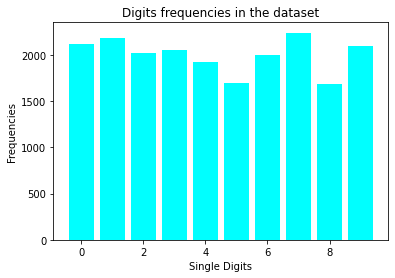

In [47]:

plt.bar(histogram.keys(), histogram.values(), color = 'cyan')   

plt.xlabel('Single Digits')
plt.ylabel('Frequencies')

plt.title('Digits frequencies in the dataset')

plt.show()

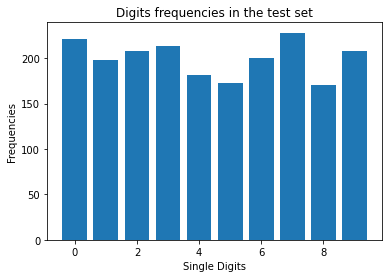

In [48]:
for i in range(10):
    
    histogram[i] = get_frequencies_of(labels[-1000: , :], i)[0]
    
plt.bar(histogram.keys(), histogram.values())   

plt.xlabel('Single Digits')
plt.ylabel('Frequencies')

plt.title('Digits frequencies in the test set')

plt.show()

# Preprocessing

In [49]:
for i, v in enumerate(data):
    
    data[i] = cv2.equalizeHist(np.uint8(np.multiply(v, 255))) / 255 #cv2.Canny(np.uint8(np.multiply(v, 255)), 127, 255)

## Concatening labels(two columns) into one target column

In [50]:
target_map = dict()

decoding_map = dict()

combined_labels = [sorted([l[0] ,l[1]]) for l in labels]

combined_labels = [str(l[0]) + str(l[1]) for l in combined_labels]

target_label = np.unique(combined_labels)

for index, value in enumerate(target_label):
    
    target_map[value] = index
    
##
for i, v in target_map.items():

  decoding_map[v] = i

##
combined_labels = [target_map[value] for value in combined_labels]

target = list(target_map)

## Splitting dataset into test & train with its labels

In [51]:
test_percent = 0.1

number_of_classes = len(target)

data_length = len(data)

x_train = data[: -int(data_length * test_percent)]

y_train = combined_labels[: -int(data_length * test_percent) :]

x_test = data[-int(data_length * test_percent) :]

y_test = combined_labels[-int(data_length * test_percent) :]

y_train = to_categorical(y_train, num_classes= number_of_classes, dtype='float32')

y_test = to_categorical(y_test, num_classes= number_of_classes, dtype='float32')

print('Train: ', x_train.shape, end= ', labels: ')
print(y_train.shape)
print('Test:  ', x_test.shape, end= ', labels: ')
print(y_test.shape)

Train:  (9000, 32, 32), labels: (9000, 45)
Test:   (1000, 32, 32), labels: (1000, 45)


## Building CNN Model with keras tuner options

In [52]:
def build_model(hp):
    
    number_of_classes = len(target)
    
    model = Sequential()
    
    model.add(
        Conv2D( 
               hp.Int("filters0", min_value= 64, max_value= 128, step= 8),
               (3, 3),
               input_shape= (32, 32, 1),
               activation= 'relu', 
               padding= hp.Choice('Padding0', ['same', 'valid'])
              )
    )
    
    model.add(MaxPooling2D(pool_size= (2, 2)))
          
    for i in range(hp.Int("cnn_layers", min_value= 1, max_value= 2)):
                   
        model.add(
            Conv2D(
                    hp.Int(f"filters1_{i}", min_value= 32, max_value= 128, step= 8),
                    (3, 3),
                    activation= 'relu',
                    padding= hp.Choice('Padding1', ['same', 'valid'])
                 )
        )
        
        model.add(MaxPooling2D(pool_size= (2, 2)))
        
                
    model.add(BatchNormalization())
        
        ###
    model.add(Flatten())

    drop_rate0 = hp.Float(f'dropout_value0', min_value = 0.2, max_value= 0.5, sampling= "log")

    model.add(Dropout(rate= drop_rate0))
    
    num_of_layers = hp.Int('num_layers', min_value= 1, max_value= 4)
    
    for i in range(num_of_layers):
        
        model.add(
            
            Dense(
                
                units= hp.Int(f"units_{i}", min_value= 1024, max_value= 2048, step= 256),
                
                activation= hp.Choice(f'activation_{i}', ['relu', 'tanh', 'sigmoid']),
            )
        )
    
        drop_rate1 = hp.Float(f'dropout_value1_{i}', min_value = 0.2, max_value= 0.5, sampling= "log")

        model.add(Dropout(rate= drop_rate1))
                   
    model.add(Dense(number_of_classes, activation= "softmax"))
                   
    learning_rate = hp.Float("learnin_rate", min_value=1e-4, max_value=1e-3, sampling= "log")
    
    momentum = hp.Float("momentum", min_value= 0.1, max_value= 0.9, sampling= "log")
                   
    nesterov = hp.Boolean("nesterov")
    
    opt_selection = hp.Int('Optimizer', min_value= 1, max_value= 4)

    if opt_selection == 1:

      opt = optimizers.SGD(learning_rate= learning_rate, momentum= momentum, nesterov= nesterov)

    elif opt_selection == 2:

      opt = optimizers.RMSprop(learning_rate= learning_rate)

    elif opt_selection == 3:

      opt = optimizers.Adam(learning_rate= learning_rate)

    elif opt_selection == 4:

      opt = optimizers.Nadam(learning_rate= learning_rate)

    model.compile(
        
        optimizer=  opt,
        
        loss= "categorical_crossentropy",
        
        metrics= ["accuracy"],
    )
    
    print('# paramters: ', model.count_params())
    
    return model

## Tuning model

In [60]:
tuner = BayesianOptimization(
                            build_model,
                            'val_accuracy',
                            20,
                            num_initial_points= 2,
                            alpha= 0.0001,
                            beta= 2.6,
                            seed= 23,
                            hyperparameters= HyperParameters(),
                            overwrite= True,
                            directory="/Tunning",
                            project_name="InaitTask",
                            )
###
train_datagen = ImageDataGenerator( 
                                    featurewise_center= True,
                                    featurewise_std_normalization= True,
                                    rotation_range= 20, 
                                    width_shift_range= 0.2, 
                                    height_shift_range= 0.2, 
                                    zoom_range= 0.2, 
                                    horizontal_flip= True,
                                    fill_mode="nearest" 
                                  ) 

tuner.search(
              train_datagen.flow(
                                x_train.reshape(x_train.shape[0], 32, 32, 1),
                                y_train,
                                batch_size= 128, 
                                seed= 27,
                                shuffle= False
                                ),
             epochs= 50, 
             validation_data= (x_test, y_test), 
             verbose= 2
             )

Trial 20 Complete [00h 02m 11s]
val_accuracy: 0.6159999966621399

Best val_accuracy So Far: 0.6850000023841858
Total elapsed time: 00h 56m 00s
INFO:tensorflow:Oracle triggered exit


In [61]:
tuner.results_summary()

Results summary
Results in /Tunning/InaitTask
Showing 10 best trials
Trial summary
Hyperparameters:
filters0: 88
Padding0: valid
cnn_layers: 1
filters1_0: 128
Padding1: same
dropout_value0: 0.2
num_layers: 1
units_0: 1280
activation_0: relu
dropout_value1_0: 0.2
learnin_rate: 0.001
momentum: 0.1
nesterov: False
Optimizer: 4
units_1: 1024
activation_1: relu
dropout_value1_1: 0.2
units_2: 1024
activation_2: relu
dropout_value1_2: 0.2
filters1_1: 32
units_3: 1024
activation_3: sigmoid
dropout_value1_3: 0.2
Score: 0.6850000023841858
Trial summary
Hyperparameters:
filters0: 128
Padding0: valid
cnn_layers: 1
filters1_0: 128
Padding1: valid
dropout_value0: 0.23339688356362487
num_layers: 1
units_0: 1280
activation_0: relu
dropout_value1_0: 0.2
learnin_rate: 0.000748076451332686
momentum: 0.1
nesterov: False
Optimizer: 4
units_1: 1024
activation_1: relu
dropout_value1_1: 0.2
units_2: 1024
activation_2: relu
dropout_value1_2: 0.2
filters1_1: 32
units_3: 1024
activation_3: sigmoid
dropout_value1

## Choose best model

In [62]:
best_model = tuner.get_best_models(num_models= 5)[0]

best_model.build(input_shape= (32, 32, 1))

best_model.summary()

# paramters:  8189981
# paramters:  6106541
# paramters:  8208573
# paramters:  8208573
# paramters:  6060061
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 6, 6, 128)        512       
 ormalizatio

## Visualize best model architecture

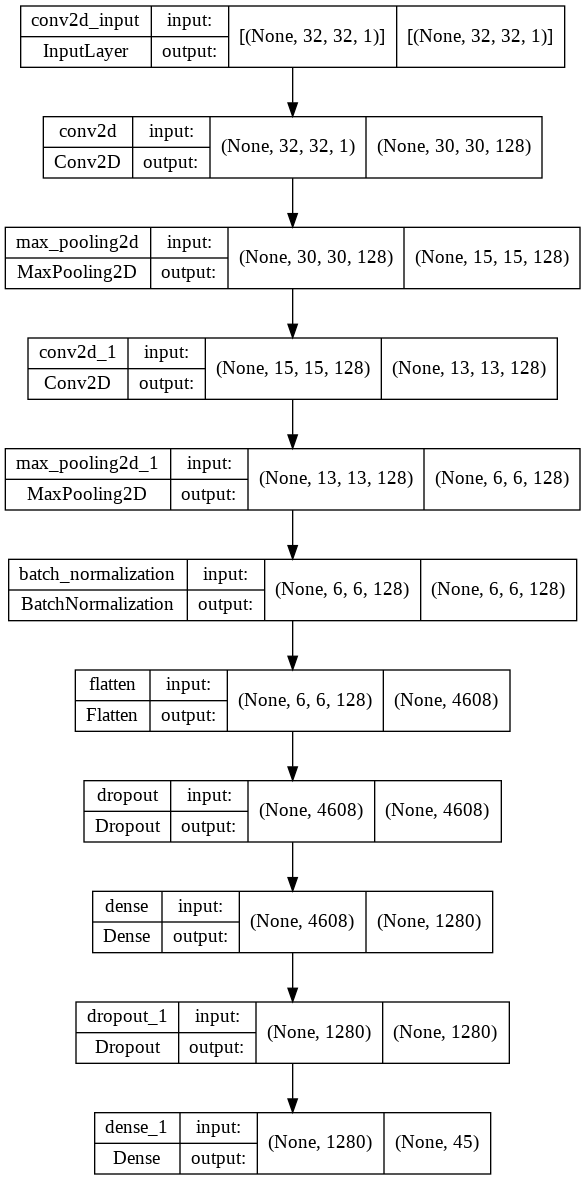

In [63]:
keras.utils.plot_model(best_model, to_file="best_model1.png", show_shapes= True) 

# Retraining models + plotting performances

Epoch 1/30
282/282 - 4s - loss: 1.1662 - accuracy: 0.6360 - val_loss: 1.2210 - val_accuracy: 0.6440 - 4s/epoch - 13ms/step
Epoch 2/30
282/282 - 3s - loss: 0.6490 - accuracy: 0.7931 - val_loss: 0.9657 - val_accuracy: 0.7130 - 3s/epoch - 9ms/step
Epoch 3/30
282/282 - 3s - loss: 0.3937 - accuracy: 0.8699 - val_loss: 0.9658 - val_accuracy: 0.7060 - 3s/epoch - 9ms/step
Epoch 4/30
282/282 - 3s - loss: 0.2584 - accuracy: 0.9133 - val_loss: 1.0807 - val_accuracy: 0.6960 - 3s/epoch - 9ms/step
Epoch 5/30
282/282 - 3s - loss: 0.2021 - accuracy: 0.9341 - val_loss: 1.8793 - val_accuracy: 0.5810 - 3s/epoch - 9ms/step
Epoch 6/30
282/282 - 3s - loss: 0.1724 - accuracy: 0.9413 - val_loss: 1.1620 - val_accuracy: 0.6950 - 3s/epoch - 9ms/step
Epoch 7/30
282/282 - 3s - loss: 0.1391 - accuracy: 0.9540 - val_loss: 1.3801 - val_accuracy: 0.6870 - 3s/epoch - 9ms/step
Epoch 8/30
282/282 - 3s - loss: 0.1179 - accuracy: 0.9617 - val_loss: 1.2676 - val_accuracy: 0.6930 - 3s/epoch - 9ms/step
Epoch 9/30
282/282 - 3s

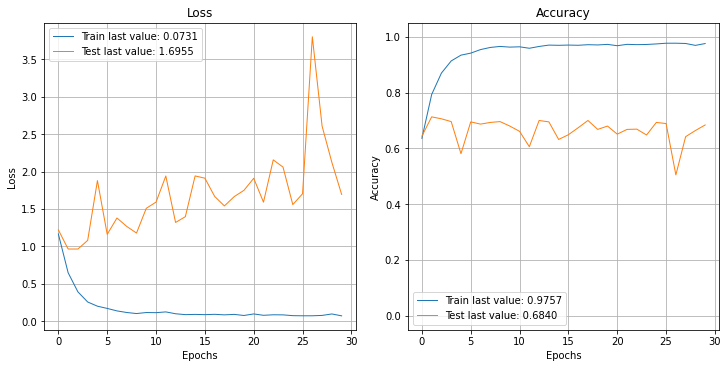

In [64]:
import datetime

history = best_model.fit(x_train, y_train, validation_data= (x_test, y_test), epochs= 30, batch_size= 32, verbose= 0)

loss, accuracy = best_model.evaluate(x_test, y_test, verbose= 0)

print(f'Test dataset --> Model loss: {np.round(loss, 2)} - model accuracy: {np.round(accuracy * 100, 1)}%')

ct = datetime.datetime.now()

show_history(history)

plot_history(history, path= f'{int(ct.timestamp())}.png')

plt.close()

# Reverse mapping

In [65]:
sample = 1

gt = best_model.predict(x_test)

digits = decoding_map[np.where(gt[sample] == max(gt[sample]))[0][0]]

list(digits)

['1', '6']

In [66]:
target_map

{'01': 0,
 '02': 1,
 '03': 2,
 '04': 3,
 '05': 4,
 '06': 5,
 '07': 6,
 '08': 7,
 '09': 8,
 '12': 9,
 '13': 10,
 '14': 11,
 '15': 12,
 '16': 13,
 '17': 14,
 '18': 15,
 '19': 16,
 '23': 17,
 '24': 18,
 '25': 19,
 '26': 20,
 '27': 21,
 '28': 22,
 '29': 23,
 '34': 24,
 '35': 25,
 '36': 26,
 '37': 27,
 '38': 28,
 '39': 29,
 '45': 30,
 '46': 31,
 '47': 32,
 '48': 33,
 '49': 34,
 '56': 35,
 '57': 36,
 '58': 37,
 '59': 38,
 '67': 39,
 '68': 40,
 '69': 41,
 '78': 42,
 '79': 43,
 '89': 44}